Data source=> https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output 

In [6]:
df = pd.read_csv("2022-2023 Football Player Stats.csv", encoding='ISO-8859-1')
df.head(3)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.0,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.0,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.0,8.14,0.93,1.05,47.1


In [7]:
df.shape

(2689, 124)

In [8]:
# To check for missing value 
for col in df.columns:
    missing_pct=np.mean(df[col].isnull()) * 100
    print('{} - {}%'.format(col,missing_pct))

Rk - 0.0%
Player - 0.0%
Nation - 0.03718854592785422%
Pos - 0.0%
Squad - 0.0%
Comp - 0.0%
Age - 0.0%
Born - 0.0%
MP - 0.0%
Starts - 0.0%
Min - 0.0%
90s - 0.0%
Goals - 0.0%
Shots - 0.0%
SoT - 0.0%
SoT% - 0.0%
G/Sh - 0.0%
G/SoT - 0.0%
ShoDist - 0.0%
ShoFK - 0.0%
ShoPK - 0.0%
PKatt - 0.0%
PasTotCmp - 0.0%
PasTotAtt - 0.0%
PasTotCmp% - 0.0%
PasTotDist - 0.0%
PasTotPrgDist - 0.0%
PasShoCmp - 0.0%
PasShoAtt - 0.0%
PasShoCmp% - 0.0%
PasMedCmp - 0.0%
PasMedAtt - 0.0%
PasMedCmp% - 0.0%
PasLonCmp - 0.0%
PasLonAtt - 0.0%
PasLonCmp% - 0.0%
Assists - 0.0%
PasAss - 0.0%
Pas3rd - 0.0%
PPA - 0.0%
CrsPA - 0.0%
PasProg - 0.0%
PasAtt - 0.0%
PasLive - 0.0%
PasDead - 0.0%
PasFK - 0.0%
TB - 0.0%
Sw - 0.0%
PasCrs - 0.0%
TI - 0.0%
CK - 0.0%
CkIn - 0.0%
CkOut - 0.0%
CkStr - 0.0%
PasCmp - 0.0%
PasOff - 0.0%
PasBlocks - 0.0%
SCA - 0.0%
ScaPassLive - 0.0%
ScaPassDead - 0.0%
ScaDrib - 0.0%
ScaSh - 0.0%
ScaFld - 0.0%
ScaDef - 0.0%
GCA - 0.0%
GcaPassLive - 0.0%
GcaPassDead - 0.0%
GcaDrib - 0.0%
GcaSh - 0.0%
GcaFld -

In [9]:
df=df[['Player','Age','MP','Min','G/SoT','PasTotCmp','Assists','Goals','Int','Clr','Blocks']]
df.head()

,Player,Age,MP,Min,G/SoT,PasTotCmp,Assists,Goals,Int,Clr,Blocks
0,Brenden Aaronson,22,20,1596,0.20,23.2,0.11,1,0.06,0.28,1.69
1,Yunis Abdelhamid,35,22,1980,0.00,38.5,0.05,0,2.00,2.91,2.23
2,Himad Abdelli,23,14,770,0.00,40.0,0.00,0,0.93,0.93,1.51
3,Salis Abdul Samed,22,20,1799,0.33,59.5,0.00,1,1.10,0.80,1.30
4,Laurent Abergel,30,15,1165,0.00,37.9,0.08,0,1.16,1.55,1.40


In [40]:
df=df[['Player','Age','MP','Min','Assists','Goals','Int','Blocks']]
df.head()

,Player,Age,MP,Min,Assists,Goals,Int,Blocks
0,Brenden Aaronson,22,20,1596,0.11,1,0.06,1.69
1,Yunis Abdelhamid,35,22,1980,0.05,0,2.00,2.23
2,Himad Abdelli,23,14,770,0.00,0,0.93,1.51
3,Salis Abdul Samed,22,20,1799,0.00,1,1.10,1.30
4,Laurent Abergel,30,15,1165,0.08,0,1.16,1.40


In [41]:
df.isna().sum()

Player     0
Age        0
MP         0
Min        0
Assists    0
Goals      0
Int        0
Blocks     0
dtype: int64

In [42]:
data=df.drop('Player',axis=1)

In [43]:
data.head()

,Age,MP,Min,Assists,Goals,Int,Blocks
0,22,20,1596,0.11,1,0.06,1.69
1,35,22,1980,0.05,0,2.00,2.23
2,23,14,770,0.00,0,0.93,1.51
3,22,20,1799,0.00,1,1.10,1.30
4,30,15,1165,0.08,0,1.16,1.40


In [44]:
# Scaling the data before finding clusters
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1,10))
scaled_data= scaler.fit_transform(data)
scaled_data

array([[3.42307692, 8.77272727, 7.93813436, ..., 1.36      , 1.054     ,
        1.7605    ],
       [7.92307692, 9.59090909, 9.60850652, ..., 1.        , 2.8       ,
        2.0035    ],
       [3.76923077, 6.31818182, 4.34509425, ..., 1.        , 1.837     ,
        1.6795    ],
       ...,
       [4.11538462, 8.77272727, 8.32092798, ..., 3.88      , 1.144     ,
        1.216     ],
       [6.88461538, 7.13636364, 4.05364911, ..., 1.36      , 1.        ,
        1.288     ],
       [6.53846154, 8.77272727, 6.76365394, ..., 1.72      , 1.306     ,
        1.3375    ]])

In [45]:
# To retain the columns 
scaled_df=pd.DataFrame(scaled_data,columns=data.columns)
scaled_df

,Age,MP,Min,Assists,Goals,Int,Blocks
0,3.423077,8.772727,7.938134,1.099,1.36,1.054,1.7605
1,7.923077,9.590909,9.608507,1.045,1.00,2.800,2.0035
2,3.769231,6.318182,4.345094,1.000,1.00,1.837,1.6795
3,3.423077,8.772727,8.821170,1.000,1.36,1.990,1.5850
4,6.192308,6.727273,6.063316,1.072,1.00,2.044,1.6300
...,...,...,...,...,...,...,...
2684,4.461538,1.409091,1.134848,3.250,1.00,1.000,1.0000
2685,4.461538,1.000000,1.030449,1.000,1.00,10.000,1.0000
2686,4.115385,8.772727,8.320928,1.243,3.88,1.144,1.2160
2687,6.884615,7.136364,4.053649,1.000,1.36,1.000,1.2880


In [46]:
scaled_df['Age'].apply(lambda x:float(x)) 

0       3.423077
1       7.923077
2       3.769231
3       3.423077
4       6.192308
          ...   
2684    4.461538
2685    4.461538
2686    4.115385
2687    6.884615
2688    6.538462
Name: Age, Length: 2689, dtype: float64

In [47]:
center=scaled_df.apply(lambda x:float(x.sample()))    
center

C:\Users\user\AppData\Local\Temp\ipykernel_10572\3189873352.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  center=scaled_df.apply(lambda x:float(x.sample()))


Age        3.423077
MP         6.318182
Min        4.623490
Assists    1.000000
Goals      1.000000
Int        1.396000
Blocks     1.000000
dtype: float64

In [48]:
# write a loop function 
def random_centroid(data,num_of_clusters):
    cluster_centers=[]
    for i in range(num_of_clusters):
        centers=data.apply(lambda x:float(x.sample()))
        cluster_centers.append(centers)
    return pd.concat(cluster_centers,axis=1)

In [57]:
centers=random_centroid(scaled_df,3)

C:\Users\user\AppData\Local\Temp\ipykernel_10572\1672657860.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centers=data.apply(lambda x:float(x.sample()))


In [31]:
np.sqrt(((scaled_df-centers.iloc[:0])**2).sum(axis=1))  #this is the formula for geometric distance

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2684    0.0
2685    0.0
2686    0.0
2687    0.0
2688    0.0
Length: 2689, dtype: float64

In [58]:
def get_label(data,centers):
        distance=centers.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
        return distance.idxmin(axis=1)

In [65]:
labels=get_label(scaled_df,centers)
labels

0       0
1       0
2       2
3       0
4       0
       ..
2684    2
2685    2
2686    0
2687    1
2688    0
Length: 2689, dtype: int64

In [66]:
labels.value_counts()

2    1489
0    1093
1     107
Name: count, dtype: int64

In [67]:
def new_centroid(data,num_of_clusters,labels):
        # group each controid and then find the geometric mean of it  
        return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T  #dot T is to turn the table

In [68]:
from sklearn.decomposition import PCA 
# To get only 2 columns from the data using pca for my chat  
pca=PCA(n_components=2)
chat=pca.fit_transform(scaled_df)
chat

array([[ 4.71437703, -1.86762072],
       [ 6.89187457,  2.37975128],
       [ 0.53361234, -1.12329229],
       ...,
       [ 5.25221706, -1.26611677],
       [ 1.30728714,  1.92683652],
       [ 4.30445538,  1.26876521]])

In [69]:
# To get the transpos of the 2 features of the centers of the clusters 
centroid=pca.fit_transform(centers.T)
centroid

array([[ 4.75617837, -0.4455814 ],
       [-1.47087115,  1.9747934 ],
       [-3.28530722, -1.529212  ]])

C:\Users\user\AppData\Local\Temp\ipykernel_10572\1753982900.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=centroid[:,0],y=centroid[:,1], marker='x', s=50, edgecolors='black', c='red')


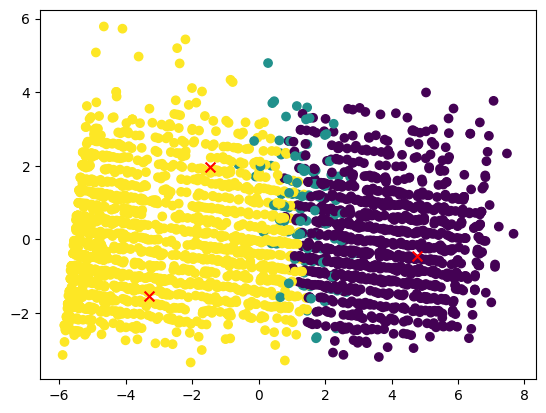

In [70]:
plt.scatter(x=chat[:,0],y=chat[:,1], c=labels)
plt.scatter(x=centroid[:,0],y=centroid[:,1], marker='x', s=50, edgecolors='black', c='red')
plt.show()

In [71]:
def plot_chats(data,labels,centers,iteration):
    pca=PCA(n_components=2)   #we are taking 2 components (like wages,age) at a time
    chat=pca.fit_transform(data)  #build 2D model 
    centroid=pca.fit_transform(centers.T)  #dotT to turn it to be the same as the data
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=chat[:,0],y=chat[:,1], c=labels)
    plt.scatter(x=centroid[:,0],y=centroid[:,1],c='red', marker='o', s=30, label='Centroids')
    plt.show()

In [72]:
def save_clusters(data, labels, iteration):
    # Create a directory for saving clusters if it doesn't exist
    output_dir = f'clusters_iteration_{iteration}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Iterate through each cluster and save the data
    for cluster_id in range(labels.max() + 1):
        cluster_data = data[labels == cluster_id]
        file_path = os.path.join(output_dir, f'cluster_{cluster_id}.csv')
        cluster_data.to_csv(file_path, index=False)
        print(f'Saved cluster {cluster_id} data to {file_path}')

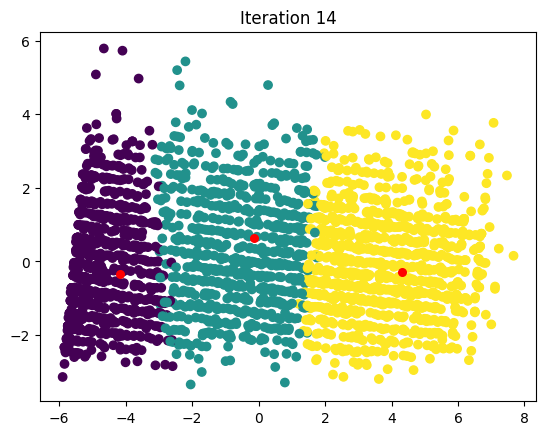

Saved cluster 0 data to clusters_iteration_15\cluster_0.csv
Saved cluster 1 data to clusters_iteration_15\cluster_1.csv
Saved cluster 2 data to clusters_iteration_15\cluster_2.csv


In [77]:
# Function definitions (as per your code)

MAX_ITERATION = 100
num_of_clusters = 3

cluster_centers = random_centroid(scaled_df, num_of_clusters)
no_clusters = pd.DataFrame()
iteration = 1

while iteration < MAX_ITERATION and not cluster_centers.equals(no_clusters):
    no_clusters = cluster_centers
    
    labels = get_label(scaled_df, cluster_centers)
    cluster_centers = new_centroid(scaled_df, num_of_clusters, labels)
    
    plot_chats(scaled_df, labels, cluster_centers, iteration)
    
    iteration += 1

    # Optionally save clusters at each iteration
    # save_clusters(scaled_df, labels, iteration)
